In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(12345)  
from scipy import stats
import imageio
from PIL import Image

# Discrete Distributions are TRICKY !!

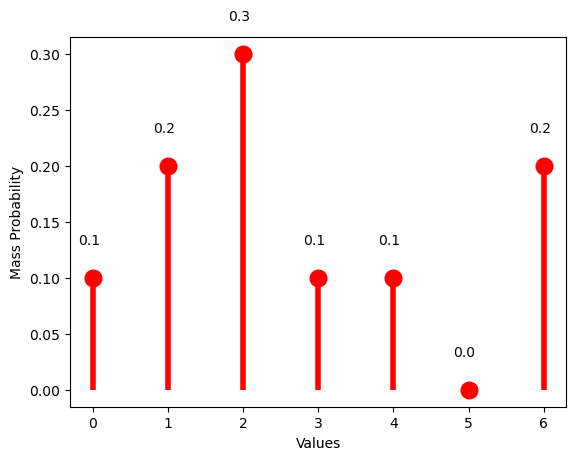

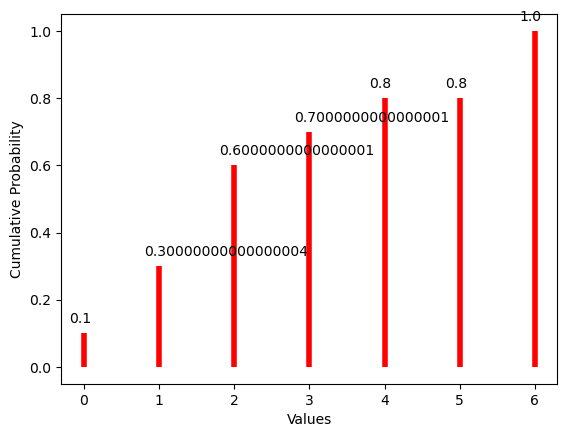

In [3]:
xk = np.arange(7)
pk = (0.1, 0.2, 0.3, 0.1, 0.1, 0.0, 0.2)

cdf = []
cumulative_probability = 0.0
for i in xk:
    cumulative_probability += pk[i]
    cdf.append(cumulative_probability)

custm = stats.rv_discrete(name='custm', values=(xk, pk))
fig, ax = plt.subplots(1, 1)
ax.plot(xk, custm.pmf(xk), 'ro', ms=12, mec='r')
ax.vlines(xk, 0, custm.pmf(xk), colors='r', lw=4)
for i, j in zip(xk, pk):
    ax.text(i-0.2, j+0.03, str(j))

# Set the x-axis and y-axis labels
ax.set_xlabel('Values')
ax.set_ylabel('Mass Probability')
plt.show()

# Plot the CDF
fig, ax = plt.subplots()
ax.vlines(xk, 0, cdf, colors='r', lw=4)
for i, j in zip(xk, cdf):
    ax.text(i-0.2, j+0.03, str(j))
# Set the x-axis and y-axis labels
ax.set_xlabel('Values')
ax.set_ylabel('Cumulative Probability')

# Show the plot
plt.show()

In [4]:

print(custm.cdf(custm.ppf(0.8))) # This shows that cdf is the inverse of ppf.
print(custm.cdf(custm.ppf(0.9))) # This shows that cdf is NOT always the inverse of ppf.
# The reason why is shown below.
print(custm.ppf(0.9)) # Note that this is 6 not 5, this is why I do not add one when I calculate the UCL.



0.8
1.0
6.0


In [5]:
def AppendixVI(n,factor=['A','n','A','A2','A3','c4','1/c4','B3','B4','B5','B6','d2','1/d2','d3','D1','D2','D3','D4'][-4]):
    #Note that appendix AppendixVI is based on 0.997 confidence level (i.e. z_zalpha_2`~2.97)'
    '''
    Just an alternative for looking up the table
    n: sample size
    factor: factor to be checked at n 
    '''
    AppendixVI=pd.read_csv('AppendixVI.csv',index_col='n')
    return AppendixVI[factor][n]

# Q1_A

In [6]:
n=150 #Here we are dealing with constant sample size #Given
P_bar=0.0185 #Average proportion of defective items #Given
alpha=0.002 #Given

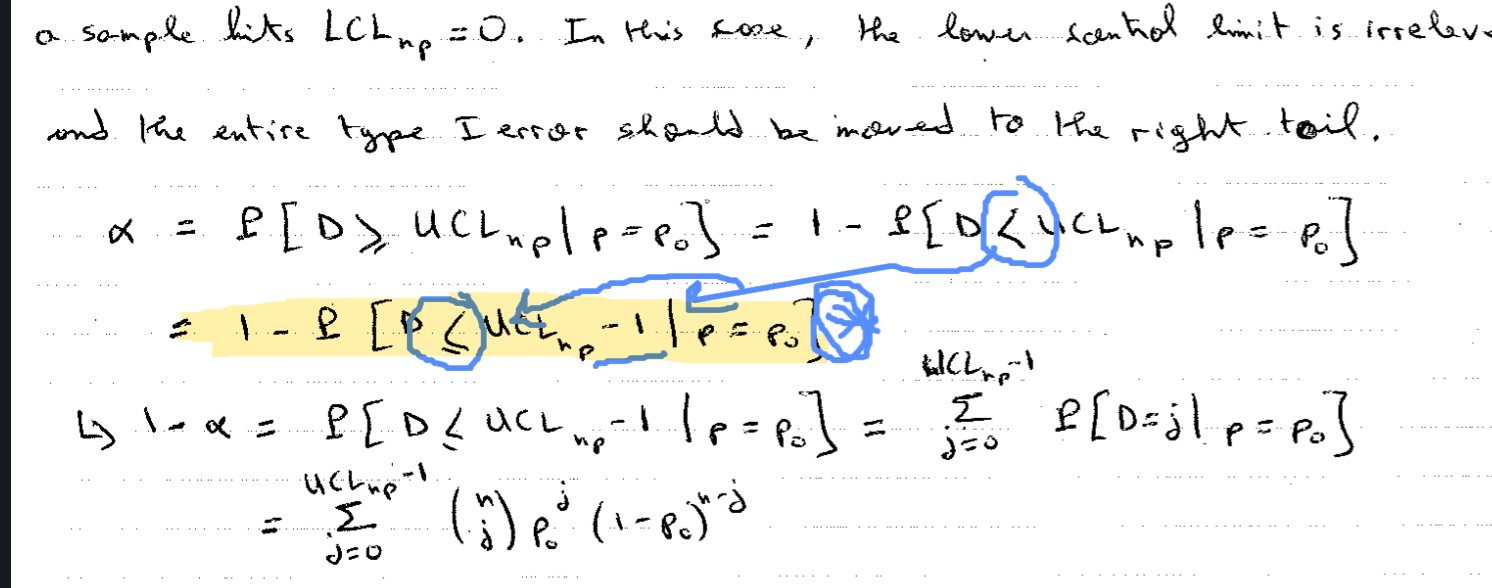

In [7]:

def LCL_np_chart(n,P_bar,alpha,printing=True):
    LCL=stats.binom.ppf(q=alpha/2,n=n,p=P_bar)
    if LCL==0:
        left_tail_type_1_error=stats.binom.cdf(k=LCL,n=n,p=P_bar)
        if printing: print(f'Having Zero Defectives is Likely For Your Case, Switch to "one-sided" Test')
        if printing:print(f'LCL is {LCL}')
        if printing: print(f"The right tail type 1 error is equal to {left_tail_type_1_error} which is irelevant !!!")
        return 0,'one-sided'
    elif LCL>0:
        left_tail_type_1_error=stats.binom.cdf(k=LCL,n=n,p=P_bar)
        if printing: print(f"The right tail type 1 error is equal to {left_tail_type_1_error}")
        #TODO: check with the instructor if the below is needed 
        if left_tail_type_1_error>alpha/2:
            LCL=max(0,LCL-1)
            left_tail_type_1_error=stats.binom.cdf(k=LCL,n=n,p=P_bar)
            if printing:print(f'LCL is {LCL}')
            if printing: print(f"The right tail type 1 error is equal to {left_tail_type_1_error} which is irelevant !!!")
            return LCL,'two-sided'


In [8]:
def UCL_np_chart(n,P_bar,alpha,mode='two-sided',printing=True,conservative=True):
    if mode not in ['two-sided','one-sided']:

        if printing: print('Mode should be either two-sided or one-sided')
        return None
    else:
        if printing: print(f'**************{mode} is Activated**************')    
        if mode=='two-sided':
            UCL=stats.binom.ppf(q=1-alpha/2,n=n,p=P_bar)
            right_tail_type_1_error=1-stats.binom.cdf(k=UCL-1,n=n,p=P_bar)
            '''
            if (right_tail_type_1_error>alpha/2):
                UCL+=1
                right_tail_type_1_error=1-stats.binom.cdf(k=UCL-1,n=n,p=P_bar)  
            ''' 
        elif mode=='one-sided':
            if printing: print(f'Having Zero Defectives is Likely For Your Case, Switch to "one-sided" Test')
            UCL=stats.binom.ppf(q=1-alpha,n=n,p=P_bar)
            right_tail_type_1_error=1-stats.binom.cdf(k=UCL-1,n=n,p=P_bar)
            '''
            if (right_tail_type_1_error>alpha):
                UCL+=1
                right_tail_type_1_error=1-stats.binom.cdf(k=UCL-1,n=n,p=P_bar)
            '''
        
        
        if printing: print(f"Your UCL is {UCL}, leading to left tail type 1 error is equal to {right_tail_type_1_error}")
        if printing: print(f"If you reduce UCL to {UCL-1},  left tail type 1 error will be equal to {1-stats.binom.cdf(k=UCL-2,n=n,p=P_bar)}")
        '''
        if conservative: #alpha conservative
            if printing: print(f'Returning Alpha Conservative UCL of {UCL}')
            return UCL
        else:
            if printing: print(f'Returning Alpha Non-Conservative UCL of {UCL-1}')
            return UCL-1
        '''
        return UCL
        
        

In [9]:
LCL,mode_recommended=LCL_np_chart(n=150,P_bar=0.0185,alpha=0.002)


Having Zero Defectives is Likely For Your Case, Switch to "one-sided" Test
LCL is 0.0
The right tail type 1 error is equal to 0.06074990322036292 which is irelevant !!!


In [10]:
UCL=UCL_np_chart(150,0.0185,0.002,mode=mode_recommended,printing=True,conservative=False)


**************one-sided is Activated**************
Having Zero Defectives is Likely For Your Case, Switch to "one-sided" Test
Your UCL is 9.0, leading to left tail type 1 error is equal to 0.002037967655534434
If you reduce UCL to 8.0,  left tail type 1 error will be equal to 0.007126030044196319


# Q1 B

In [11]:
p_1=0.04 #Given
if mode_recommended=='two-sided':
    beta=stats.binom.cdf(UCL-1,n=n,p=p_1)-stats.binom.cdf(LCL,n=n,p=p_1)
elif mode_recommended=='one-sided':
    beta=stats.binom.cdf(UCL-1,n=n,p=p_1)-stats.binom.cdf(0,n=n,p=p_1)
print(f'beta is {beta}')

beta is 0.849299305058348


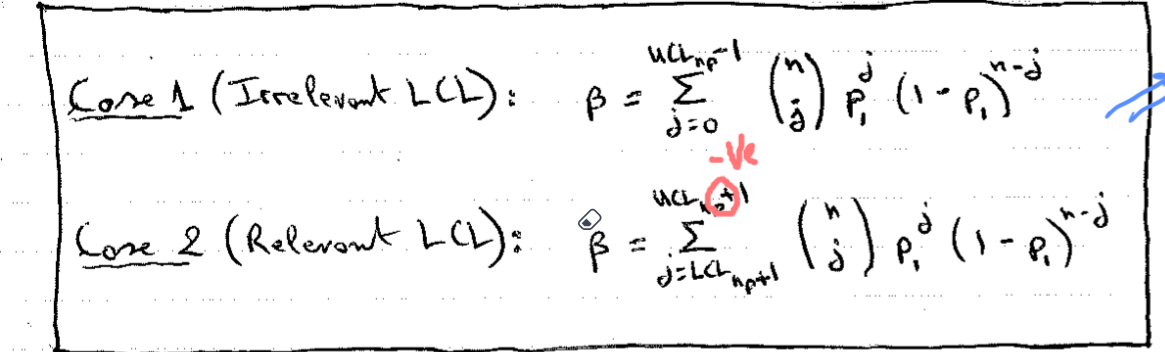
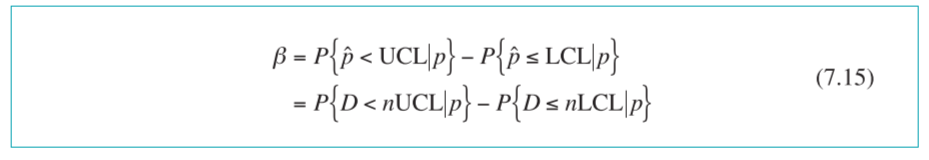

# Q1 C

Text(0.5, 1.0, 'beta vs n')

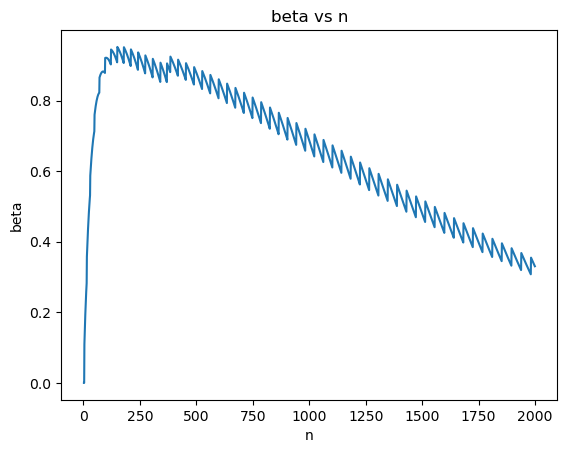

In [12]:
p_1=0.03 #Given
p_0=0.0185 #Given
alpha=0.002 #Given
beta_list=[]
LCL_list=[]
UCL_list=[]
null_hypothis_CL=[]
alternative_hypothis_CL=[]

n_list=np.arange(2,2000,1)
for n_current in n_list:
    LCL,mode_recommended=LCL_np_chart(n=n_current,P_bar=p_0,alpha=alpha,printing=False)
    UCL=UCL_np_chart(n=n_current,P_bar=p_0,alpha=alpha,mode=mode_recommended,printing=False,conservative=False)

    beta=stats.binom.cdf(UCL-1,n=n_current,p=p_1)-stats.binom.cdf(LCL,n=n_current,p=p_1)
    beta_list.append(beta)
    LCL_list.append(LCL)
    UCL_list.append(UCL)
    null_hypothis_CL.append(p_0*n_current)
    alternative_hypothis_CL.append(p_1*n_current)
plt.plot(n_list,beta_list) #The plot look weird, in the beginning, increasing n increase beta error ??
plt.xlabel('n')
plt.ylabel('beta')
plt.title('beta vs n')

In [13]:
target_beta=0.5
mask_satisfying=np.array(beta_list)<=target_beta
index_satisfying = np.where(mask_satisfying)[0].tolist()


In [14]:
for index in index_satisfying:
    beta_formatted = "{:.3f}".format(beta_list[index])
    LCL_formatted = "{:.2f}".format(LCL_list[index])
    UCL_formatted = "{:.2f}".format(UCL_list[index])
    print(f' At n={n_list[index]}, beta={beta_formatted}, LCL={LCL_formatted}, UCL={UCL_formatted}') 

 At n=2, beta=0.000, LCL=0.00, UCL=1.00
 At n=3, beta=0.000, LCL=0.00, UCL=1.00
 At n=4, beta=0.110, LCL=0.00, UCL=2.00
 At n=5, beta=0.133, LCL=0.00, UCL=2.00
 At n=6, beta=0.155, LCL=0.00, UCL=2.00
 At n=7, beta=0.175, LCL=0.00, UCL=2.00
 At n=8, beta=0.194, LCL=0.00, UCL=2.00
 At n=9, beta=0.212, LCL=0.00, UCL=2.00
 At n=10, beta=0.228, LCL=0.00, UCL=2.00
 At n=11, beta=0.243, LCL=0.00, UCL=2.00
 At n=12, beta=0.258, LCL=0.00, UCL=2.00
 At n=13, beta=0.271, LCL=0.00, UCL=2.00
 At n=14, beta=0.283, LCL=0.00, UCL=2.00
 At n=15, beta=0.357, LCL=0.00, UCL=3.00
 At n=16, beta=0.374, LCL=0.00, UCL=3.00
 At n=17, beta=0.391, LCL=0.00, UCL=3.00
 At n=18, beta=0.406, LCL=0.00, UCL=3.00
 At n=19, beta=0.421, LCL=0.00, UCL=3.00
 At n=20, beta=0.435, LCL=0.00, UCL=3.00
 At n=21, beta=0.449, LCL=0.00, UCL=3.00
 At n=22, beta=0.461, LCL=0.00, UCL=3.00
 At n=23, beta=0.473, LCL=0.00, UCL=3.00
 At n=24, beta=0.484, LCL=0.00, UCL=3.00
 At n=25, beta=0.495, LCL=0.00, UCL=3.00
 At n=1422, beta=0.500, 

Text(0.5, 0, 'n')

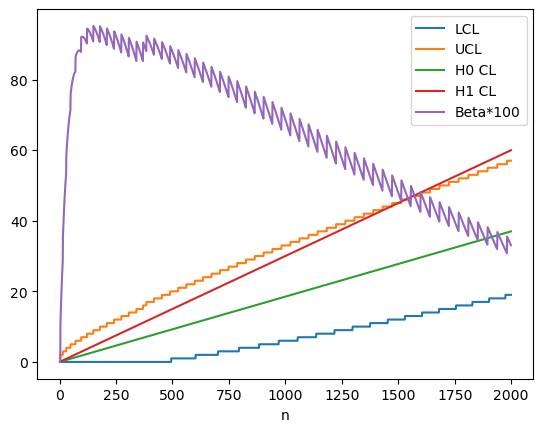

In [15]:
plt.plot(n_list,LCL_list,label='LCL')
plt.plot(n_list,UCL_list,label='UCL')
plt.plot(n_list,null_hypothis_CL,label='H0 CL')
plt.plot(n_list,alternative_hypothis_CL,label='H1 CL')
plt.plot(n_list,np.array(beta_list)*100,label='Beta*100')
plt.legend()
plt.xlabel('n')



Text(0.5, 0, 'n')

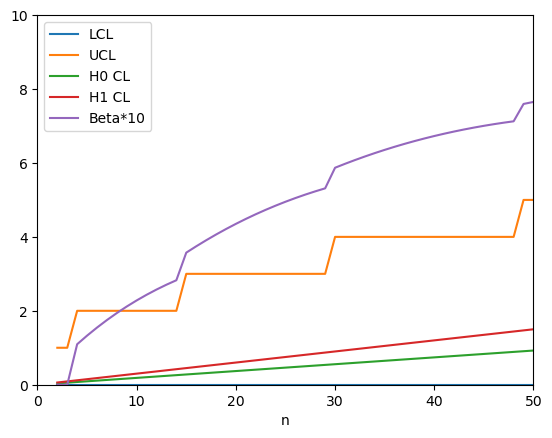

In [16]:
plt.plot(n_list,LCL_list,label='LCL')
plt.plot(n_list,UCL_list,label='UCL')
plt.plot(n_list,null_hypothis_CL,label='H0 CL')
plt.plot(n_list,alternative_hypothis_CL,label='H1 CL')
plt.plot(n_list,np.array(beta_list)*10,label='Beta*10')
plt.xlim(0,50)
plt.ylim(0,10)
plt.legend()
plt.xlabel('n')

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def get_binomial(n, p):
    # Generate an array of possible outcomes for the binomial distribution
    x = np.arange(0, n+1)

    # Calculate the probabilities for each outcome
    probabilities = np.zeros(n+1)
    for i in range(n+1):
        probabilities[i] = np.math.comb(n, i) * p**i * (1-p)**(n-i)

    # Return the x and y values of the distribution as arrays
    return x, probabilities

In [18]:

frames = []
for n_current in list(np.arange(2,100))+[120]:
    index_current = list(n_list).index(n_current)
    plt.figure(figsize=(10, 6))
    #x, y = get_binomial(n_current, p_0)
    #plt.bar(x, y, alpha=0.5, label=f'Null')
    x, y = get_binomial(n_current, p_1)
    plt.bar(x, y, alpha=0.5, label=f'Alt')    
    plt.axvline(x=LCL_list[index_current], color='r', label='LCL')
    plt.axvline(x=UCL_list[index_current], color='g', label='UCL')
    plt.title(f'n={n_current}')
    plt.legend()
    plt.xlim([-1, 10])
    plt.ylim([0, 0.4])  # set a consistent y-axis limit for all plots
    # Save the current plot as a frame of the gif
    fig = plt.gcf()
    canvas = fig.canvas
    canvas.draw()
    width, height = fig.get_size_inches() * fig.get_dpi()
    image = np.frombuffer(canvas.tostring_rgb(), dtype='uint8').reshape(int(height), int(width), 3)
    image = Image.fromarray(image)
    frames.append(image)

for n_current in list(np.arange(100,800,10))+[900,1000]:
    index_current = list(n_list).index(n_current)
    plt.figure(figsize=(10, 6))
    #x, y = get_binomial(n_current, p_0)
    #plt.bar(x, y, alpha=0.5, label=f'Null')
    x, y = get_binomial(n_current, p_1)
    plt.bar(x, y, alpha=0.5, label=f'Alt')    
    plt.axvline(x=LCL_list[index_current], color='r', label='LCL')
    plt.axvline(x=UCL_list[index_current], color='g', label='UCL')
    plt.title(f'n={n_current}')
    plt.legend()
    plt.xlim([-1, 30])
    plt.ylim([0, 0.4])  # set a consistent y-axis limit for all plots
    # Save the current plot as a frame of the gif
    fig = plt.gcf()
    canvas = fig.canvas
    canvas.draw()
    width, height = fig.get_size_inches() * fig.get_dpi()
    image = np.frombuffer(canvas.tostring_rgb(), dtype='uint8').reshape(int(height), int(width), 3)
    image = Image.fromarray(image)
    frames.append(image)
    plt.close()

# Save the frames as a gif
imageio.mimsave('binomial_Alt.gif', frames, fps=1)

C:\Users\mabob\AppData\Local\Temp\ipykernel_28804\2875150994.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10, 6))


I tried to figure it out, and the best explanation I got so far is as follows:

Increasing n increase both UCL  (pushes it to right) and also pushes the null hypothesis to the right (Pushes CL to the right and spreads the dist).
If the movement of the UCL to the right is very slow, we end up adding more mass between the LCL and UCL thus increasing beta. 
This happens at very low n and every now and then at high n (i.e. the zigzag-like trend when UCL is not moving at the video). 